In [1]:
import spacy
nlp = spacy.load('en_core_web_sm')

d:\python 3.6\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\python 3.6\lib\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\python 3.6\lib\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\python 3.6\lib\site-packages\tensorflow\python\framework\dtypes.py:522: FutureWarning: Passing (type, 1) or '1type' as a synonym of type

###  text preprocessing

In [2]:
doc = nlp('Weather is good, very windy and sunny. We have no classes in the afternoon.')

In [3]:
#tokenization
for token in doc:
    print(token)

Weather
is
good
,
very
windy
and
sunny
.
We
have
no
classes
in
the
afternoon
.


In [4]:
# Clausing 
for sentence in doc.sents:
    print(sentence)

Weather is good, very windy and sunny.
We have no classes in the afternoon.


### Part-of-Speech (PoS) tagging
[link reference](http://www.winwaed.com/blog/2011/11/08/part-of-speech-tags/).

In [5]:
for token in doc:
    print('{}-{}'.format(token,token.pos_))

Weather-NOUN
is-AUX
good-ADJ
,-PUNCT
very-ADV
windy-ADJ
and-CCONJ
sunny-ADJ
.-PUNCT
We-PRON
have-VERB
no-DET
classes-NOUN
in-ADP
the-DET
afternoon-NOUN
.-PUNCT


### Named Entity Recognition

In [6]:
doc_2 = nlp("I went to Paris where I met my old friend Jack from uni.")
for ent in doc_2.ents:
    print('{}-{}'.format(ent,ent.label_))

Paris-GPE
Jack-PERSON


In [7]:
from spacy import displacy

doc = nlp("I went to Paris where I met my old friend Jack from uni.")
displacy.render(doc, style = 'ent', jupyter = True)

### Find the name of character in a book

In [8]:
def read_file(file_name):
    with open(file_name, 'r') as file:
        return file.read()
    

In [9]:
# input book text data
text = read_file('./data/pride_and_prejudice.txt')
processed_text = nlp(text)

In [10]:
sentences = [s for s in processed_text.sents]
print(len(sentences))

6814


In [11]:
sentences[:10]

[The Project Gutenberg EBook of Pride and Prejudice, by Jane Austen
 , This eBook is for the use of anyone anywhere at no cost and with
 almost no restrictions whatsoever.,  , You may copy it, give it away or
 re-use it under the terms of the Project Gutenberg License included
 with this eBook or online at www.gutenberg.org, 
 
 , Title: Pride and Prejudice
 
 Author: Jane Austen
 , Posting Date: August 26, 2008 [EBook #1342], Release Date: June, 1998, Last updated: February 15, 2015]
 
 Language: English
 
 
 *** START OF THIS PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***
 
 
 
 
 Produced by Anonymous Volunteers
 
 
 
 
 
 PRIDE AND PREJUDICE
 
 By Jane Austen
 
 
 
 Chapter 1, 
 
 ]

In [12]:
from collections import Counter, defaultdict

In [13]:
def find_person(doc):
    c = Counter()
    for ent in processed_text.ents:
        if ent.label_ == 'PERSON':
            c[ent.lemma_] += 1
    return c.most_common(10)

print(find_person(processed_text))

[('Elizabeth', 617), ('Darcy', 391), ('Jane', 267), ('Bennet', 229), ('Wickham', 176), ('Collins', 168), ('Bingley', 133), ('Lizzy', 94), ('Lady Catherine', 88), ('Gardiner', 87)]


### Terrorist attacks analysis

In [14]:
def read_file_to_list(file_name):
    with open(file_name, 'r') as file:
        return file.readlines()

In [15]:
terrorism_articles = read_file_to_list('data/rand-terrorism-dataset.txt')

In [16]:
terrorism_articles[:5]

['CHILE.  An explosion from a single stick of dynamite went off on the patio of the Santiago Binational Center, causing $21,000 in damages.\n',
 'ISRAEL.  Palestinian terrorists fired five mortar shells into the collective settlement at Masada, causing slight damage but no injuries.\n',
 'GUATEMALA.  A bomb was thrown over the wall surrounding the U.S. Marines guards house in Guatemala City, causing damage but no injuries.\n',
 'FRANCE.  Five French students bombed the Paris offices of   Chase Manhattan Bank before dawn.  Trans-World Airways and the Bank of America were also bombed.   They claimed to be protesting the U.S. involvement in the Vietnam war.\n',
 'UNITED STATES - Unidentified anti-Castro Cubans attempted to bomb the Miami branch of the Spanish National Tourist Office.\n']

In [17]:
terrorism_articles_nlp = [nlp(art) for art in terrorism_articles]

In [18]:
common_terrorist_groups = [
    'taliban', 
    'al - qaeda', 
    'hamas',  
    'fatah', 
    'plo', 
    'bilad al - rafidayn'
]

common_locations = [
    'iraq',
    'baghdad', 
    'kirkuk', 
    'mosul', 
    'afghanistan', 
    'kabul',
    'basra', 
    'palestine', 
    'gaza', 
    'israel', 
    'istanbul', 
    'beirut', 
    'pakistan'
]

In [26]:
location_entity_dict = defaultdict(Counter)

for article in terrorism_articles_nlp:
    article_terrorist_groups = [ent.lemma_ for ent in article.ents if ent.label_ == 'PERSON' or  ent.label_ == 'ORG' ] # person of an organization
    article_locations = [ent.lemma_ for ent in article.ents if ent.label_ == 'GPE'] # location 
    terrorist_common = [ent for ent in article_terrorist_groups if ent in common_terrorist_groups]
    locations_common = [ent for ent in article_locations if ent in article_locations]
    
    for found_entity in article_terrorist_groups:
        for found_location in article_locations:
            location_entity_dict[found_entity][found_location] += 1


In [27]:
location_entity_dict

defaultdict(collections.Counter,
            {'the Santiago Binational Center': Counter({'CHILE': 1}),
             'Chase Manhattan Bank': Counter({'FRANCE': 1,
                      'Paris': 1,
                      'U.S.': 1,
                      'CHILE': 1}),
             'Trans - World Airways': Counter({'FRANCE': 1,
                      'Paris': 1,
                      'U.S.': 1}),
             'the Bank of America': Counter({'FRANCE': 2,
                      'Paris': 2,
                      'U.S.': 4,
                      'Milan': 2,
                      'Vietnam': 1,
                      'LEBANON': 2,
                      'Beirut': 4,
                      'Israel': 1,
                      'Lebanon': 2,
                      'Algeria': 2,
                      'Rome': 2,
                      'Italy': 2,
                      'Syria': 1,
                      'Lima': 1,
                      'France': 1,
                      'Washington': 1,
                      'Li

In [28]:
import pandas as pd

location_entity_df = pd.DataFrame.from_dict(dict(location_entity_dict),dtype=int)
location_entity_df = location_entity_df.fillna(value = 0).astype(int)
location_entity_df

,the Santiago Binational Center,Chase Manhattan Bank,Trans - World Airways,the Bank of America,anti - Castro,the Spanish National Tourist Office,El Poder Cubano,the Haitian Coalition,the Australian National Tourist Office,the Mexican National Tourist Office,...,the Northwest Frontier Region,the New Democracy Party,International Islamic University,Sur Gol Khan,the Afghan Independent Election Commission,UNDP,the Ethiopian Consulate,Dawa Khan Menapal of,Radio Free Europe / Radio Liberty,Aziz Popal
CHILE,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FRANCE,0,1,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Paris,0,1,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U.S.,0,1,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Milan,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bak District,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Samangan Province,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Torkham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hargeysa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,0


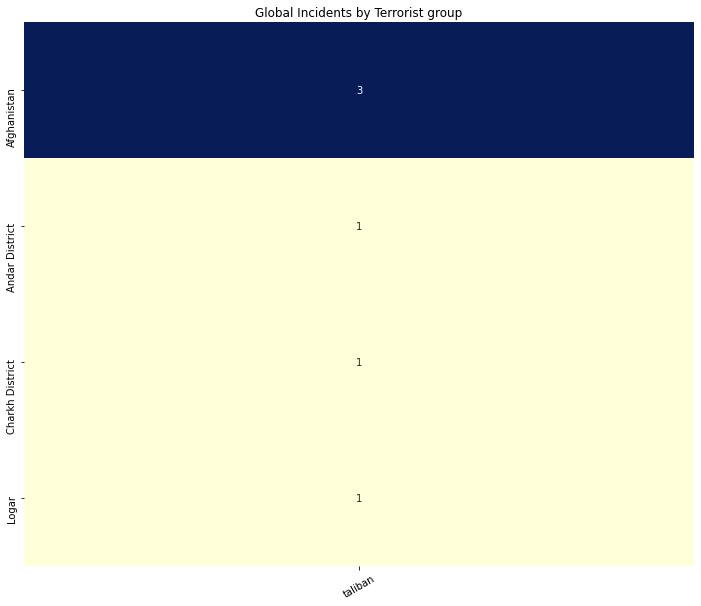

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
hmap = sns.heatmap(location_entity_df, annot=True, fmt='d', cmap='YlGnBu', cbar=False)

# 添加信息
plt.title('Global Incidents by Terrorist group')
plt.xticks(rotation=30)
plt.show()